## __DeskDrop datasets EDA__

In [1]:
import pandas as pd
from datetime import datetime
import re

### __Users interactions__

This section explores the dataset file containing users interactions on shared articles (users_interactions.csv).

In [2]:
interactions_df = pd.read_csv('./input/users_interactions.csv')
interactions_df

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
72307,1485190425,LIKE,-6590819806697898649,-9016528795238256703,8614469745607949425,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4...,MG,BR
72308,1485190425,VIEW,-5813211845057621660,102305705598210278,5527770709392883642,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,SP,BR
72309,1485190072,VIEW,-1999468346928419252,-9196668942822132778,-8300596454915870873,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,SP,BR
72310,1485190434,VIEW,-6590819806697898649,-9016528795238256703,8614469745607949425,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4...,MG,BR


In [3]:
def to_datetime(ts):
    return datetime.fromtimestamp(ts)

def to_datetime_str(ts):
    return to_datetime(ts).strftime('%Y-%m-%d %H:%M:%S')

print('First interaction: \t%s' % to_datetime_str(interactions_df['timestamp'].min()))
print('Last interaction: \t%s' % to_datetime_str(interactions_df['timestamp'].max()))

First interaction: 	2016-03-14 22:54:36
Last interaction: 	2017-03-01 04:21:51


In [4]:
interactions_df.columns

Index(['timestamp', 'eventType', 'contentId', 'personId', 'sessionId',
       'userAgent', 'userRegion', 'userCountry'],
      dtype='object')

In [5]:
interactions_df['userAgent'].values

array([nan,
       'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/52.0.2743.24 Safari/537.36',
       nan, ...,
       'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.87 Safari/537.36',
       'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.95 Safari/537.36',
       'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.87 Safari/537.36'],
      dtype=object)

In [6]:
total_count = len(interactions_df)
android_count = len(interactions_df[interactions_df['userAgent'] == 'Android - Native Mobile App'])
ios_count = len(interactions_df[interactions_df['userAgent'] == 'iOS - Native Mobile App'])
print('# of interactions (total): \t%d' % total_count)
print('# of interactions (Android native app): \t%d' % android_count)
print('# of interactions (iOS native app): \t%d' % ios_count)

# of interactions (total): 	72312
# of interactions (Android native app): 	6761
# of interactions (iOS native app): 	103


In [7]:
import nltk
# from konlpy.tag import Komoran, Kkma;
# kkma = Kkma()
# Komoran = Komoran()

def count_keywords(corpus_list):
    vocab = nltk.Text(corpus_list, name='text').vocab()
    vocab_common = vocab.most_common(len(vocab))
    return vocab_common

In [8]:
count_keywords(interactions_df['userAgent'])[:10]

[(nan, 15394),
 ('Android - Native Mobile App', 6761),
 ('Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36',
  1823),
 ('Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/52.0.2743.116 Safari/537.36',
  1146),
 ('Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/52.0.2743.116 Safari/537.36',
  1076),
 ('Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36',
  1059),
 ('Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.106 Safari/537.36',
  1011),
 ('Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36',
  885),
 ('Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36',
  859),
 ('Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko

In [9]:
# 혹은 다른 방법
interactions_df.groupby('userAgent').size().sort_values(ascending=False)

userAgent
Android - Native Mobile App                                                                                                                                     6761
Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36                                                  1823
Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/52.0.2743.116 Safari/537.36                                                  1146
Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/52.0.2743.116 Safari/537.36                                                       1076
Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36                                                   1059
                                                                                                                                                                ... 


In [10]:
interactions_df.columns

Index(['timestamp', 'eventType', 'contentId', 'personId', 'sessionId',
       'userAgent', 'userRegion', 'userCountry'],
      dtype='object')

In [11]:
count_keywords(interactions_df['eventType'])

[('VIEW', 61086),
 ('LIKE', 5745),
 ('BOOKMARK', 2463),
 ('COMMENT CREATED', 1611),
 ('FOLLOW', 1407)]

In [12]:
interactions_df.groupby('eventType').size().sort_values(ascending=False)

eventType
VIEW               61086
LIKE                5745
BOOKMARK            2463
COMMENT CREATED     1611
FOLLOW              1407
dtype: int64

In [13]:
print(type(count_keywords(interactions_df['eventType'])))
print(type(interactions_df.groupby('eventType').size().sort_values(ascending=False)))

<class 'list'>
<class 'pandas.core.series.Series'>


In [14]:
count_keywords(interactions_df['userRegion'])[:5]

[('SP', 40164), (nan, 15405), ('MG', 10229), ('NY', 1257), ('TX', 923)]

In [15]:
interactions_df[:3]

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN


<AxesSubplot:title={'center':'# interactions by month'}, xlabel='month'>

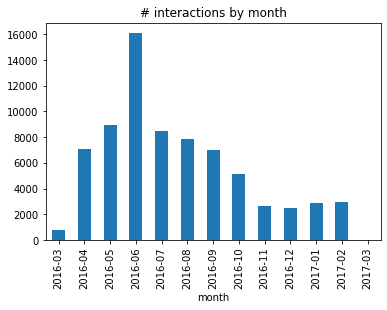

In [16]:
interactions_df['datetime'] = interactions_df['timestamp'].apply(lambda x: to_datetime(x))
interactions_df['month'] = interactions_df['datetime'].apply(lambda x: '{0}-{1:02}'.format(x.year, x.month))
interactions_df.groupby('month').size().plot(kind='bar', title='# interactions by month')

__이벤트 타입__

- VIEW: The user has opened the article.
- LIKE: The user has liked the article.
- COMMENT CREATED: The user created a comment in the article.
- FOLLOW: The user chose to be notified on any new comment in the article.
- BOOKMARK: The user has bookmarked the article for easy return in the future.

In [17]:
interactions_df.groupby('eventType').size().sort_values(ascending=False)

eventType
VIEW               61086
LIKE                5745
BOOKMARK            2463
COMMENT CREATED     1611
FOLLOW              1407
dtype: int64

In [18]:
print('Distinct articles: \t%d' % len(interactions_df['contentId'].unique()))
print('Distinct users: \t%d' % len(interactions_df['personId'].unique()))
print('Distinct user sessions: \t%d' % len(interactions_df['sessionId'].unique()))

Distinct articles: 	2987
Distinct users: 	1895
Distinct user sessions: 	28740


The analysis of how many articles (items) a user has interacted with is important for recommender systems. Higher number of items consumed by users provides better modeling of users preference.

__We can observe that 50% of the users have interacted with 10 or more articles, making this dataset very suitable for collaborative filtering or content-based filtering methods.__

In [19]:
interactions_df.columns

Index(['timestamp', 'eventType', 'contentId', 'personId', 'sessionId',
       'userAgent', 'userRegion', 'userCountry', 'datetime', 'month'],
      dtype='object')

In [20]:
interactions_df.groupby('personId')['contentId'].size().describe()

count    1895.000000
mean       38.159367
std       104.143355
min         1.000000
25%         3.000000
50%        10.000000
75%        32.000000
max      1885.000000
Name: contentId, dtype: float64

In [21]:
interactions_df.groupby('personId')['contentId'].size()

personId
-9223121837663643404     63
-9212075797126931087      9
-9207251133131336884     14
-9199575329909162940     15
-9196668942822132778     10
                       ... 
 9165571805999894845      8
 9187866633451383747     26
 9191849144618614467     19
 9199170757466086545     26
 9210530975708218054    135
Name: contentId, Length: 1895, dtype: int64

<AxesSubplot:>

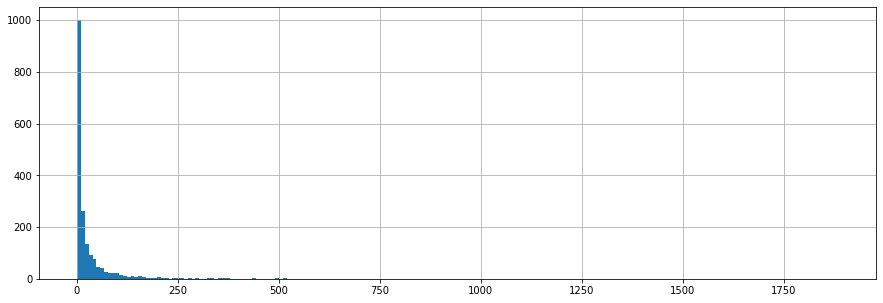

In [22]:
interactions_df.groupby('personId')['contentId'].size().hist(bins=200, figsize=(15, 5))

In [23]:
interactions_df.groupby('userCountry').size().sort_values(ascending=False)

userCountry
BR    51396
US     4657
KR      239
CA      226
JP      144
AU      138
GB       22
DE       19
IE       14
IS       13
ZZ       11
SG       11
AR        7
PT        6
IN        3
ES        3
IT        2
MY        2
CO        1
CN        1
CL        1
CH        1
NL        1
dtype: int64

In [24]:
country_code_dict = {
    'BR': ('BRA', 'Brazil'),
    'US': ('USA', 'United States'),
    'KR': ('KOR', 'South Korea'),
    'CA': ('CAN', 'Canada'),
    'JP': ('JPN', 'Japan'),
    'AU': ('AUS', 'Australia'),
    'GB': ('GBR', 'United Kingdom'),
    'DE': ('DEU', 'Germany'),
    'DE': ('DEU', 'Germany'),
    'IE': ('IRL', 'Ireland'),
    'IS': ('ISL', 'Iceland'),
    'SG': ('SGP', 'Singapure'),
    'AR': ('ARG', 'Argentina'),
    'PT': ('PRT', 'Portugal'),
    'IN': ('IND', 'India'),
    'ES': ('ESP', 'Spain'),
    'IT': ('ITA', 'Italy'),
    'MY': ('MYS', 'Malaysia'),
    'CO': ('COL', 'Colombia'),
    'CN': ('CHN', 'China'),
    'CL': ('CHL', 'Chile'),
    'NL': ('NLD', 'Netherlands')
}

interactions_df['countryName'] = interactions_df['userCountry'].apply(
    lambda x: country_code_dict[x][1] if x in country_code_dict else None)
interactions_df[['userCountry', 'countryName']].head(10)

,userCountry,countryName
0,NaN,None
1,US,United States
2,NaN,None
3,NaN,None
4,NaN,None
5,BR,Brazil
6,NaN,None
7,BR,Brazil
8,NaN,None
9,NaN,None


In [25]:
interactions_by_country_df = pd.DataFrame(interactions_df.groupby('countryName').size() \
                                         .sort_values(ascending=False).reset_index())
interactions_by_country_df.columns = ['country', 'count']
interactions_by_country_df

,country,count
0,Brazil,51396
1,United States,4657
2,South Korea,239
3,Canada,226
4,Japan,144
5,Australia,138
6,United Kingdom,22
7,Germany,19
8,Ireland,14
9,Iceland,13


In [ ]:
import plotly.offline as py
py.offline.init_notebook_mode()

data = [ dict(
        type = 'choropleth',
        locations = interactions_by_country_df['country'],
        z = interactions_by_country_df['count'],
        locationmode = 'country names',
        text = interactions_by_country_df['country'],
        colorscale = [[0,"rgb(153, 241, 243)"],[0.005,"rgb(16, 64, 143)"],[1,"rgb(0, 0, 0)"]],
        autocolorscale = False,
        marker = dict(
            line = dict(color = 'rgb(58,100,69)', width = 0.6)),
            colorbar = dict(autotick = True, tickprefix = '', title = '# of Interactions')
            )
       ]

layout = dict(
    title = 'Total number of interactions by country',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
        type = 'equirectangular'
        ),
    margin = dict(b = 0, t = 0, l = 0, r = 0)
            )
    )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

In [30]:
interactions_df['userCountryRegion'] = interactions_df['userCountry'] + '-' + interactions_df['userRegion']
interactions_df.groupby('userCountryRegion').size().sort_values(ascending=False).head(10)

userCountryRegion
BR-SP    40164
BR-MG    10229
US-NY     1257
US-TX      923
US-GA      910
BR-RJ      775
US-NJ      698
US-CA      238
CA-ON      202
KR-?       165
dtype: int64

### __Shared articles__

this section analyzes the articles shared in the platform

In [32]:
articles_df = pd.read_csv('./input/shared_articles.csv')
articles_df.head()

,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
0,1459192779,CONTENT REMOVED,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,CONTENT SHARED,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,CONTENT SHARED,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en


In [33]:
articles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3122 entries, 0 to 3121
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   timestamp        3122 non-null   int64 
 1   eventType        3122 non-null   object
 2   contentId        3122 non-null   int64 
 3   authorPersonId   3122 non-null   int64 
 4   authorSessionId  3122 non-null   int64 
 5   authorUserAgent  680 non-null    object
 6   authorRegion     680 non-null    object
 7   authorCountry    680 non-null    object
 8   contentType      3122 non-null   object
 9   url              3122 non-null   object
 10  title            3122 non-null   object
 11  text             3122 non-null   object
 12  lang             3122 non-null   object
dtypes: int64(4), object(9)
memory usage: 317.2+ KB


In [34]:
articles_df.groupby('eventType').size().sort_values(ascending=False)

eventType
CONTENT SHARED     3047
CONTENT REMOVED      75
dtype: int64

In [35]:
articles_df.groupby('title').size().sort_values(ascending=False)

title
Preventing Software Bugs from Ever Occurring - Quality Functions                          8
Fooling The Machine                                                                       7
Dries Buytaert                                                                            5
Vidente reflete sobre os desafios contemporâneos                                          4
Adobe CQ/Adobe AEM                                                                        4
                                                                                         ..
Opening Up Data Science with data.world - Jono Bacon                                      1
Opening Google Docs, Sheets, and Slides files on mobile now easier when you're offline    1
OpenVpn rodando com Docker no Raspberry Pi                                                1
OpenBazaar is Open for Business                                                           1
""Good Luck with That!": Teaching Machines to Detect Sarcasm" by Xinyi Ou 

In [38]:
print('First article sharing: \t%s' % to_datetime(articles_df['timestamp'].min()))
print('Last article sharing: \t%s' % to_datetime(articles_df['timestamp'].max()))

First article sharing: 	2016-03-29 04:19:39
Last article sharing: 	2017-03-01 03:51:11


In [40]:
articles_df.columns

Index(['timestamp', 'eventType', 'contentId', 'authorPersonId',
       'authorSessionId', 'authorUserAgent', 'authorRegion', 'authorCountry',
       'contentType', 'url', 'title', 'text', 'lang'],
      dtype='object')

<AxesSubplot:title={'center':'# articles shared by month'}, xlabel='month'>

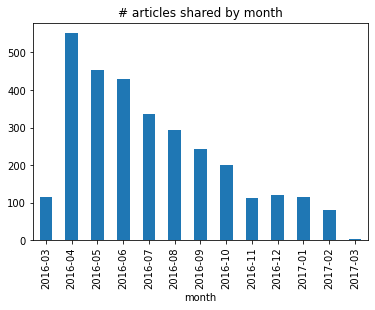

In [42]:
articles_df['datetime'] = articles_df['timestamp'].apply(lambda x: to_datetime(x))
articles_df['month'] = articles_df['datetime'].apply(lambda x: '{0}-{1:02}'.format(x.year, x.month))
articles_df[articles_df['eventType'] == 'CONTENT SHARED'].groupby('month').size().plot(kind='bar', title='# articles shared by month')

In [43]:
articles_df.groupby('eventType').size().sort_values(ascending=False)

eventType
CONTENT SHARED     3047
CONTENT REMOVED      75
dtype: int64

In [46]:
print('Distinct articles: \t%d' % len(articles_df['contentId'].unique()))
print('Distinct sharers (users): \t%d' % len(articles_df['authorPersonId'].unique()))

Distinct articles: 	3057
Distinct sharers (users): 	252


In [47]:
articles_df.groupby('contentType').size().sort_values(ascending=False)

contentType
HTML     3101
VIDEO      11
RICH       10
dtype: int64

In [49]:
articles_df.groupby('lang').size().sort_values(ascending=False)

lang
en    2264
pt     850
la       4
ja       2
es       2
dtype: int64

In [50]:
articles_df['url']

0       http://www.nytimes.com/2016/03/28/business/dea...
1       http://www.nytimes.com/2016/03/28/business/dea...
2       http://cointelegraph.com/news/bitcoin-future-w...
3       https://cloudplatform.googleblog.com/2016/03/G...
4       https://bitcoinmagazine.com/articles/ibm-wants...
                              ...                        
3117    https://startupi.com.br/2017/02/liga-ventures-...
3118    https://thenextweb.com/apps/2017/02/14/amazon-...
3119                          https://code.org/about/2016
3120    https://www.bloomberg.com/news/articles/2017-0...
3121    https://www.acquia.com/blog/partner/2017-acqui...
Name: url, Length: 3122, dtype: object

In [51]:
articles_df['urlDomain'] = articles_df['url'].apply(lambda x: re.sub(r'^http[s]*:\/\/', '', re.search(r'^http[s]*:\/\/[\w\.]*', x, re.IGNORECASE).group(0)))
articles_df[['urlDomain', 'url']].head()

,urlDomain,url
0,www.nytimes.com,http://www.nytimes.com/2016/03/28/business/dea...
1,www.nytimes.com,http://www.nytimes.com/2016/03/28/business/dea...
2,cointelegraph.com,http://cointelegraph.com/news/bitcoin-future-w...
3,cloudplatform.googleblog.com,https://cloudplatform.googleblog.com/2016/03/G...
4,bitcoinmagazine.com,https://bitcoinmagazine.com/articles/ibm-wants...


<AxesSubplot:title={'center':'Main domains on shared English articles'}, ylabel='urlDomain'>

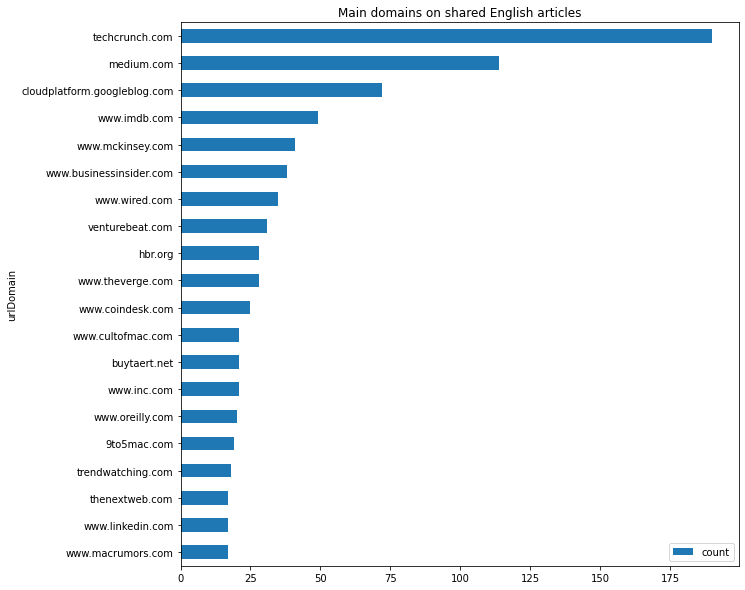

In [54]:
main_domains_df = pd.DataFrame(articles_df[articles_df['lang'] == 'en'].groupby('urlDomain').size().sort_values(ascending=True))[-20:].reset_index()
main_domains_df.columns = ['urlDomain', 'count']
main_domains_df.plot(kind='barh', x='urlDomain', y='count', figsize=(10, 10),
                    title='Main domains on shared English articles')